In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
csvpath = os.path.join('WildLifeTrade2016-2017.csv')
wtrade_df = pd.read_csv(csvpath)
#Set kwards for diagrams
kwargs_figs = {'figsize': (12, 6), 'fontsize': 16}
wtrade_df.head(1)

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C


In [3]:
#Visualizing Data
wtrade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67400 entries, 0 to 67399
Data columns (total 16 columns):
Year                          67400 non-null int64
App.                          67400 non-null object
Taxon                         67400 non-null object
Class                         47061 non-null object
Order                         67343 non-null object
Family                        66939 non-null object
Genus                         65941 non-null object
Importer                      67329 non-null object
Exporter                      66822 non-null object
Origin                        25667 non-null object
Importer reported quantity    31900 non-null float64
Exporter reported quantity    44226 non-null float64
Term                          67400 non-null object
Unit                          6449 non-null object
Purpose                       61339 non-null object
Source                        66853 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 8.2+

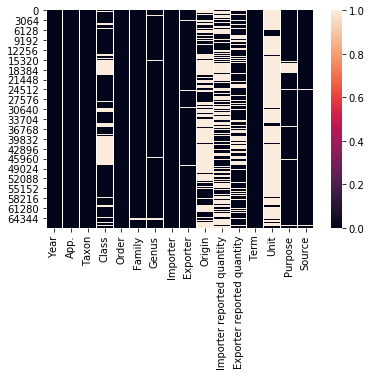

In [4]:
sns.heatmap(wtrade_df.isnull())
plt.show()

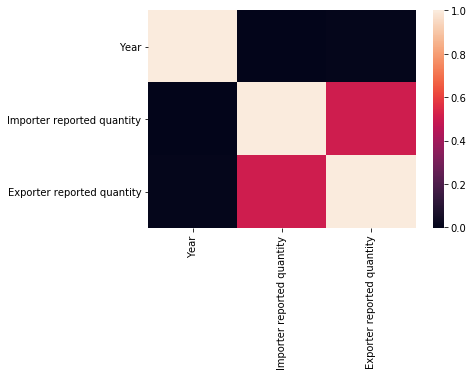

In [5]:
sns.heatmap(wtrade_df.corr())
plt.show()

In [6]:
#Cleansing

In [7]:
column_names = wtrade_df.keys()
column_names

Index(['Year', 'App.', 'Taxon', 'Class', 'Order', 'Family', 'Genus',
       'Importer', 'Exporter', 'Origin', 'Importer reported quantity',
       'Exporter reported quantity', 'Term', 'Unit', 'Purpose', 'Source'],
      dtype='object')

In [8]:
#Top Importer/Exporter
column_search_ie = input("Please specify search term for Importer/Exporter top 10: ")
top_10_region = pd.DataFrame(wtrade_df[column_search_ie].value_counts().head(10))
top_10_region['Region'] = top_10_region.index
top_10_region.index = range(10)
top_10_region

Please specify search term for Importer/Exporter top 10: 


KeyError: ''

In [9]:
#Data counts
wtrade_df['Year'].value_counts().head()

2016    67007
2017      393
Name: Year, dtype: int64

In [11]:
wtrade_df['Class'].value_counts().head()

Reptilia       18476
Anthozoa        8794
Mammalia        8533
Aves            6886
Actinopteri     2759
Name: Class, dtype: int64

In [ ]:
taxon_trade_groups = wtrade_df.groupby(['Purpose','Term'])['Term'].value_counts()
appendices_by_taxon = taxon_trade_groups.groupby(level=0).count()
appendices_by_taxon

In [ ]:
taxon_trade_groups = wtrade_df.groupby(['App.','Taxon'])['Taxon'].value_counts()
appendices_by_taxon = taxon_trade_groups.groupby(level=0).count()
print('Total traded appendices: %s' %(appendices_by_taxon).sum())
appendices_by_taxon
#list(appendices_by_taxon)

In [ ]:
appendices_by_taxon.plot.bar(**kwargs_figs, title ='WLT')
plt.show()

In [ ]:
appendices = wtrade_df['App.'].value_counts()
appendices

In [ ]:
appendices.plot.bar(**kwargs_figs, title ='WLT')
plt.show()

In [ ]:
wtrade2_df = wtrade_df.set_index('Genus')
wtrade2_df.loc['Crocodylus','Term'].value_counts()


In [ ]:
wtrade_df['Genus'].value_counts().head(10)
df = pd.DataFrame(wtrade_df['Genus'].value_counts().head(10))
df

In [ ]:
list(wtrade_df['Genus'].unique())

In [ ]:
df.plot.bar(**kwargs_figs)
plt.show()

In [ ]:
(pd.DataFrame()
     .assign(Exports=wtrade_df.Exporter.value_counts(), 
             Imports=wtrade_df.Importer.value_counts())
     .pipe(lambda df: df.loc[df.fillna(0).sum(axis='columns').sort_values(ascending=False).index])
     .head(10)
     .plot.bar(**kwargs_figs, title="Top 10 Import/Export Countries")
)
plt.show()

In [ ]:
sns.heatmap(wtrade_df.isnull())

In [ ]:
#sns.boxplot(data=wtrade_df)

In [ ]:
#fig, ax = plt.subplots()
#sns.violinplot(x = "Importer reported quantity", y = "Exporter reported quantity", data = wtrade_df)
# Load the data
#tips = sns.load_dataset("wtrade_df")

# Create violinplot
#sns.violinplot(x = "Year", data=tips)

# Show the plot
plt.show()

In [ ]:
sns.heatmap(wtrade_df.corr())
plt.show()

In [ ]:
#sns.distplot(wtrade_df.Importer reported quantity)
sns.countplot(x='Type 1', data=wtrade_df)

In [ ]:
Percentage = 100 * wtrade_df['Term'].value_counts()/wtrade_df['Term'].value_counts().sum()
Percentage

In [ ]:
a = []
taxon_trade_groups = wtrade_df.groupby(['App.','Taxon'])['Taxon'].value_counts()
appendices_count = taxon_trade_groups.groupby(level=0).count()
print('Total traded appendices: %s' %(appendices_count).sum())
appendices_count

In [ ]:
#taxon_groups = wtrade_df.groupby(['Taxon']).count()
#taxon_groups

In [ ]:
wtrade_df2 = wtrade_df.set_index("Taxon")
wtrade_df2.head()

In [ ]:
crocodiles = wtrade_df2.loc["Crocodylus niloticus",:]
crocodiles

In [ ]:
top_taxon = taxon_trade_groups.groupby(level=1).sum()

top_taxon.sort_values(ascending = False).head(10)

In [ ]:
trading_purposes = wtrade_df['Purpose'].value_counts()
trading_purposes.rename(index='Purpose',inplace=True)

In [ ]:
trading_purposes = wtrade_df['Source'].value_counts()
trading_purposes.rename(index='Source',inplace=True)

In [ ]:
trading_purposes = wtrade_df['Term'].value_counts()
trading_purposes.rename(index='Term',inplace=True)